# Verhältnis von Source-Code-Änderungen im Build

In [2]:
import dask.dataframe as dd
import pandas as pd

def sloc_percent(row):
    row['sloc_percent'] = 100*(row.git_diff_src_churn.astype('float')/row.gh_sloc.astype('float'))
    return row

df = dd.read_csv('data/travistorrent_11_1_2017.csv',blocksize=25000000,usecols=['tr_build_id','gh_project_name','git_num_all_built_commits','gh_is_pr','git_trigger_commit','gh_sloc','git_diff_src_churn','gh_diff_files_added','gh_diff_files_deleted','gh_diff_files_modified'])
#df = dd.read_csv('data/travistorrent_11_1_2017.csv',blocksize=25000000,usecols=['tr_build_id','gh_project_name','git_num_all_built_commits','git_trigger_commit','gh_sloc','git_diff_src_churn'])
pdf = df.drop_duplicates().map_partitions(sloc_percent).compute()

## Prozentuale Änderung der Source-Code-Zeilen pro Build
###  Absteigende Sortierung

In [3]:
pdf.sort_values('sloc_percent',inplace=True,ascending=False)
pdf.head(20)

,tr_build_id,gh_project_name,gh_is_pr,git_num_all_built_commits,git_trigger_commit,git_diff_src_churn,gh_diff_files_added,gh_diff_files_deleted,gh_diff_files_modified,gh_sloc,sloc_percent
25603,76568953,ReactiveX/RxJava,False,1,639cbc529541f58d8ad9a94a5fdb8ab8eca6afbd,27258,0,298,1,3,908600.000000
19640,416091,Compass/compass-rails,False,16,bfb7b09370323247e77ed6b8cf5fd33847d58814,24782,254,215,11,11,225290.909091
3164,46755790,junegunn/fzf,False,1,209a6d36ad900468d54ce0c2d13fefed2c4c836e,3946,36,0,4,7,56371.428571
19704,45778280,junegunn/fzf,False,1,f3177305d5572b26f135fc045481358b4eb1bf69,3333,30,0,2,7,47614.285714
19708,45778839,junegunn/fzf,True,1,f3177305d5572b26f135fc045481358b4eb1bf69,3333,30,0,2,7,47614.285714
37673,2964376,mperham/sidekiq,True,30,410fa639af9fedda9ff4b823c30f766817cdb063,2296,33,6,9,5,45920.000000
2334,9446939,thoughtbot/high_voltage,False,1,e1c5165afe14437d4ea9d1f8cfed95ca47a3eb01,4089,9,74,2,9,45433.333333
15151,1327202,joliss/jquery-ui-rails,False,2,c89a75038bf76fe8202389475868d26b9a3b6f88,13666,127,0,2,95,14385.263158
27550,46649355,junegunn/fzf,False,3,7a2bc2cada971c7a390d09b0afda34780ff56fb6,960,0,0,26,7,13714.285714
27554,46649365,junegunn/fzf,True,3,7a2bc2cada971c7a390d09b0afda34780ff56fb6,960,0,0,26,7,13714.285714


Ergebnis: Viele Builds haben gar keine Änderungen an den Source Code files. Diese Dateien interessieren uns nicht.

[ReactiveX/RXJava - Sauberer Start von Release 2.0 durch wegschmeißen von Version 1.0](https://github.com/ReactiveX/RxJava/commit/639cbc529541f58d8ad9a94a5fdb8ab8eca6afbd)

### Aufsteigende Sortierung

In [15]:
pdfrange = pdf[(pdf.sloc_percent > 0.0) & (pdf.sloc_percent < 5)]
pdfrange.head(20)

,tr_build_id,gh_project_name,gh_is_pr,git_num_all_built_commits,git_trigger_commit,git_diff_src_churn,gh_diff_files_added,gh_diff_files_deleted,gh_diff_files_modified,gh_sloc,sloc_percent
14063,33600309,restlet/restlet-framework-java,False,1,e5d0928e8401efacb7e1a2887c106e9052a69390,6465,27,0,40,129306,4.999768
1009,34031754,querydsl/querydsl,False,1,cd01beab9493c9a22ce888c665629b8d121053af,2280,25,0,198,45603,4.999671
1007,34031744,querydsl/querydsl,True,1,cd01beab9493c9a22ce888c665629b8d121053af,2280,25,0,198,45603,4.999671
5337,30099582,grails/grails-core,False,3,5b8d246db19781f96b0f6b7893e1461398ed87a1,3338,5,4,95,66765,4.999626
5644,95694569,Frege/frege,False,3,22d78b86d75198d7834a28114d27f700ec76f0c3,343,1,0,18,6861,4.999271
7135,1660912,activeadmin/activeadmin,False,3,5836d892674c87421024b5e842348d7442689d38,316,2,2,22,6321,4.999209
27449,136791371,jnunemaker/flipper,False,1,2917757e21e403b3a67a28dca0a1cf914cb5f7cc,178,0,0,1,3561,4.998596
27456,136791386,jnunemaker/flipper,True,1,2917757e21e403b3a67a28dca0a1cf914cb5f7cc,178,0,0,1,3561,4.998596
23935,13721569,thinkaurelius/titan,False,1,d4ce9fc843730950b5ac89edb02548fa6b9e8daf,1371,10,0,33,27428,4.998542
26960,12192541,padrino/padrino-framework,False,1,3e0bf1b3e128063d244b5139596d147a0c53bc32,392,4,0,7,7843,4.998087


Ergebnis: Builds ohne Source Code changes (sloc_percent == 0) wurden raus gefiltert.

Populating the interactive namespace from numpy and matplotlib


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd7a5c14588>]], dtype=object)

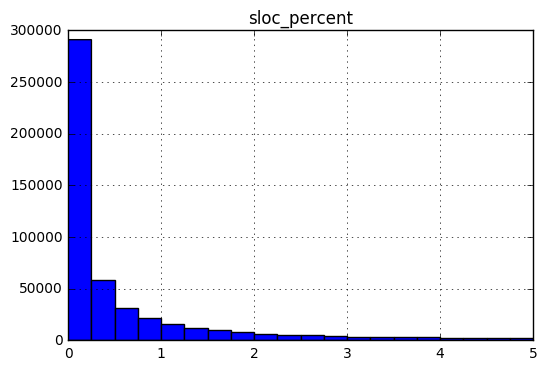

In [17]:
%pylab inline
pdfrange.hist(column='sloc_percent',bins=20)

Abb.: Hier wurden alle Projekte mit weniger als 3% Änderungen betrachtet.

Ergebnis: In einem typischen Builds werden nicht mehr als 1% der Codebasis verändert.

Folgerung: Betrachtung der Änderungsarten per Build (Siehe: TypOfChangesPerBuild.ipynb)